DATASET:https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

# BUSSINESS UNDERSTANDING

Tidur menjadi kegiatan yang wajib untuk setiap individunya lakukan dikarenakan tidur adalah masa dimana badan kita dapat beristirahat dan beberapa organ dalam seperti ginjal, hati dan yang lain nya dapat melakukan proses ekskresinya dengan baik dimalam hari. Malam hari adalah waktu yang sangat tepat dan ideal untuk dilakukan nya tidur.

Kualitas tidur seseorang sangat penting juga dikarenakan bersangkutan dengan kualitas hidup dan kualitas kesehatan setiap individunya.

Dengan banyaknya kegiatan yang dilakukan dimalam hari berdasarkan kepentingannya masing-masing menyebabkan beberapa orang tidak melakukan tidur dimalam hari yang mana akan berdampak buruk pada kesehatannya.

Berdasarkan permasalahan diatas, perlu dibuatnya model yang membantu mengklasifikasi dan memprediksi bagaimana kualitas tidur setiap individunya.

Model ini dibuat menggunakan metode klasifikasi dengan algoritma regresi linear dengan beberapa output yang mengeluarkan output kualitas tidur mereka yang dibagi menjadi 3 kategori, yaitu: Normal, Insomnia dan Apnea Sleep

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('sleep.csv')

# DATA UNDERSTANDING

Deskripsi dataset:

Personal ID: Pengenal untuk setiap individu.

Gender: Jenis kelamin orang tersebut (Pria/Wanita).

Age: Usia orang tersebut dalam tahun.

Occupation: Pekerjaan atau profesi orang tersebut.

SD : Jumlah jam orang tersebut tidur per hari.

QOS (skala: 1-10): Penilaian subjektif dari kualitas tidur, mulai dari 1 hingga 10.

PAL (menit/hari): Jumlah menit orang tersebut melakukan aktivitas fisik setiap hari.

SL (skala: 1-10): Penilaian subjektif dari tingkat stres yang dialami oleh orang tersebut, mulai dari 1 hingga 10.

BMI: Kategori BMI orang tersebut (misalnya, Berat Badan Kurang, Normal, Berat Badan Berlebih).

BP (sistolik/diastolik): Pengukuran tekanan darah seseorang, yang ditunjukkan sebagai tekanan sistolik dibandingkan tekanan diastolik.

HR (bpm): Denyut jantung istirahat seseorang dalam denyut per menit.

DS: Jumlah langkah yang dilakukan seseorang per hari.

Sleep_Disorder: Ada atau tidaknya gangguan tidur pada orang tersebut (Normal, Insomnia, Sleep Apnea).

Detail tentang Kolom Gangguan Tidur:

Normal: Individu tidak menunjukkan gangguan tidur tertentu.

Insomnia: Individu mengalami kesulitan untuk tertidur atau tetap tertidur, yang menyebabkan tidur yang tidak memadai atau berkualitas buruk.

Sleep Apnea: Individu mengalami henti napas saat tidur, yang mengakibatkan gangguan pola tidur dan potensi risiko kesehatan.

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,SD,QOS,PAL,SL,BMI,BP,HR,DS,Sleep_Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Normal
1,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
2,17,Female,29,Nurse,6.5,5,40,7,Normal,132/87,80,4000,Sleep Apnea
3,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
4,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal


In [4]:
df.shape

(374, 13)

In [5]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'SD', 'QOS', 'PAL', 'SL',
       'BMI', 'BP', 'HR', 'DS', 'Sleep_Disorder'],
      dtype='object')

In [6]:
df['Sleep_Disorder'].value_counts()

Normal         219
Sleep Apnea     78
Insomnia        77
Name: Sleep_Disorder, dtype: int64

In [7]:
df['Sleep_Disorder'].unique()

array(['Normal', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Person ID       374 non-null    int64  
 1   Gender          374 non-null    object 
 2   Age             374 non-null    int64  
 3   Occupation      374 non-null    object 
 4   SD              374 non-null    float64
 5   QOS             374 non-null    int64  
 6   PAL             374 non-null    int64  
 7   SL              374 non-null    int64  
 8   BMI             374 non-null    object 
 9   BP              374 non-null    object 
 10  HR              374 non-null    int64  
 11  DS              374 non-null    int64  
 12  Sleep_Disorder  374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [9]:
df.isnull().sum()

Person ID         0
Gender            0
Age               0
Occupation        0
SD                0
QOS               0
PAL               0
SL                0
BMI               0
BP                0
HR                0
DS                0
Sleep_Disorder    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df_objects = df.select_dtypes(include='object')
df_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          374 non-null    object
 1   Occupation      374 non-null    object
 2   BMI             374 non-null    object
 3   BP              374 non-null    object
 4   Sleep_Disorder  374 non-null    object
dtypes: object(5)
memory usage: 14.7+ KB


# DATA PREPROSESSING

In [12]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
df['Occupation'].unique()

array(['Software Engineer', 'Sales Representative', 'Nurse', 'Doctor',
       'Teacher', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [14]:
df['BMI'].unique()

array(['Overweight', 'Obese', 'Normal'], dtype=object)

In [15]:
df['BP'].unique()

array(['126/83', '140/90', '132/87', '125/80', '120/80', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [16]:
df['Sleep_Disorder'].unique()

array(['Normal', 'Sleep Apnea', 'Insomnia'], dtype=object)

<Axes: xlabel='Sleep_Disorder', ylabel='Count'>

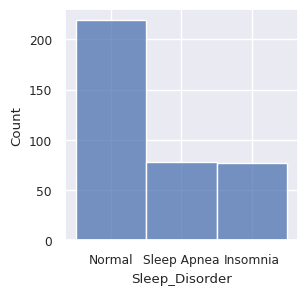

In [17]:
plt.figure(figsize=(3,3))
sns.set(font_scale=0.8)
sns.histplot(data=df, x='Sleep_Disorder')

In [18]:
df2 = df.groupby('QOS')[['PAL','SL']].mean()

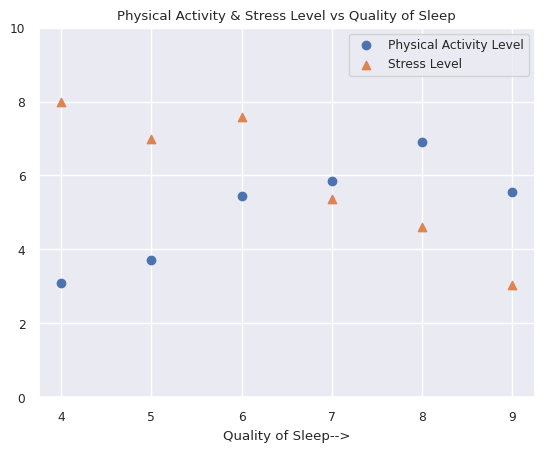

In [19]:
ax = plt.subplot(1,1,1)
x = df2.index
ax.scatter(x,df2['PAL'].to_numpy()/10,marker='o')
ax.scatter(x,df2['SL'].to_numpy(),marker='^')
ax.set_xlabel('Quality of Sleep-->')
plt.ylim(0,10)
plt.title('Physical Activity & Stress Level vs Quality of Sleep')
plt.legend(['Physical Activity Level','Stress Level'])
plt.show()

In [20]:
df['Sleep_Disorder'] = df['Sleep_Disorder'].replace(['Normal', 'Sleep Apnea', 'Insomnia'],
                                                    [0,1,2])
df['Gender'] = df['Gender'].replace(['Male', 'Female'], [0,1])
df['BMI'] = df['BMI'].replace(['Normal', 'Overweight', 'Obese'], [0,1,2])
df['Gender'] = df['Gender'].replace(['Male', 'Female'], [0,1])
df['Gender'] = df['Gender'].replace(['Male', 'Female'], [0,1])

In [21]:
Blood_Pressure = df['BP'].values.astype(str)
Systolic, Diastolic = [], []
for idx,val in enumerate(Blood_Pressure): # split the systolic and diastolic values
    Systolic.append(int(str(val).split('/')[0]))
    Diastolic.append(int(str(val).split('/')[1]))

df = df.drop('BP',axis=1)
df.insert(7,'Systolic',Systolic)
df.insert(8,'Diastolic',Diastolic)

In [22]:
df = df.drop(['Person ID','Occupation'], axis=1)

In [23]:
df.head()

,Gender,Age,SD,QOS,PAL,Systolic,Diastolic,SL,BMI,HR,DS,Sleep_Disorder
0,0,27,6.1,6,42,126,83,6,1,77,4200,0
1,0,28,5.9,4,30,140,90,8,2,85,3000,1
2,1,29,6.5,5,40,132,87,7,0,80,4000,1
3,0,28,6.2,6,60,125,80,8,0,75,10000,0
4,0,28,6.2,6,60,125,80,8,0,75,10000,0


In [24]:
df.columns

Index(['Gender', 'Age', 'SD', 'QOS', 'PAL', 'Systolic', 'Diastolic', 'SL',
       'BMI', 'HR', 'DS', 'Sleep_Disorder'],
      dtype='object')

# MODELLING

In [25]:
X = df.drop(columns='Sleep_Disorder', axis=1)
Y = df['Sleep_Disorder']

In [26]:
print(X)

     Gender  Age   SD  QOS  PAL  Systolic  Diastolic  SL  BMI  HR     DS
0         0   27  6.1    6   42       126         83   6    1  77   4200
1         0   28  5.9    4   30       140         90   8    2  85   3000
2         1   29  6.5    5   40       132         87   7    0  80   4000
3         0   28  6.2    6   60       125         80   8    0  75  10000
4         0   28  6.2    6   60       125         80   8    0  75  10000
..      ...  ...  ...  ...  ...       ...        ...  ..  ...  ..    ...
369       1   59  8.1    9   75       140         95   3    1  68   7000
370       1   59  8.0    9   75       140         95   3    1  68   7000
371       1   59  8.1    9   75       140         95   3    1  68   7000
372       1   59  8.1    9   75       140         95   3    1  68   7000
373       1   59  8.1    9   75       140         95   3    1  68   7000

[374 rows x 11 columns]


In [27]:
print(Y)

0      0
1      1
2      1
3      0
4      0
      ..
369    1
370    1
371    1
372    1
373    1
Name: Sleep_Disorder, Length: 374, dtype: int64


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, stratify=Y, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(374, 11) (224, 11) (150, 11)


In [30]:
model = LogisticRegression()

In [31]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [33]:
print("Akurasi data training : ", training_data_accuracy*100)

Akurasi data training :  80.35714285714286


In [34]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [35]:
print("Akurasi data testing : ", testing_data_accuracy*100)

Akurasi data testing :  80.66666666666666


In [36]:
df.head()

,Gender,Age,SD,QOS,PAL,Systolic,Diastolic,SL,BMI,HR,DS,Sleep_Disorder
0,0,27,6.1,6,42,126,83,6,1,77,4200,0
1,0,28,5.9,4,30,140,90,8,2,85,3000,1
2,1,29,6.5,5,40,132,87,7,0,80,4000,1
3,0,28,6.2,6,60,125,80,8,0,75,10000,0
4,0,28,6.2,6,60,125,80,8,0,75,10000,0


# EVALUATION

In [37]:
#input_data = (0,27,6.1,6,42,126,83,6,1,77,4200) # 0
#input_data = (1,29,6.5,5,40,7,0,132,87,80,4000) # 1
input_data = (0,28,5.9,4,30,140,90,8,2,85,3000) # 2

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)
print()

if prediction == 0:
    print('Kualitas Tidur Termasuk Kedalam Kategori Normal')
elif prediction == 1:
    print('Kualitas Tidur Termasuk Kedalam Kategori Sleep Apnea')
else:
    print('Kualitas Tidur Termasuk Kedalam Kategori Insomnia')
print()
print('Saran: ')
if prediction == 0:
    print('Kualitas tidur mu sudah normal, pertahankan yaa!')
elif prediction == 1:
    print('Sepertinya kamu perlu latihan fisik dan penurunan berat badan nih')
else:
    print('Perbanyak olahraga dan jaga pola hidup untuk kualitas tidur yang lebih baik yap! ')

[2]

Kualitas Tidur Termasuk Kedalam Kategori Insomnia

Saran: 
Perbanyak olahraga dan jaga pola hidup untuk kualitas tidur yang lebih baik yap! 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# DEPLOYMENT

In [38]:
import pickle

In [39]:
filename = 'sleep_model.sav'
pickle.dump(model, open(filename, 'wb'))